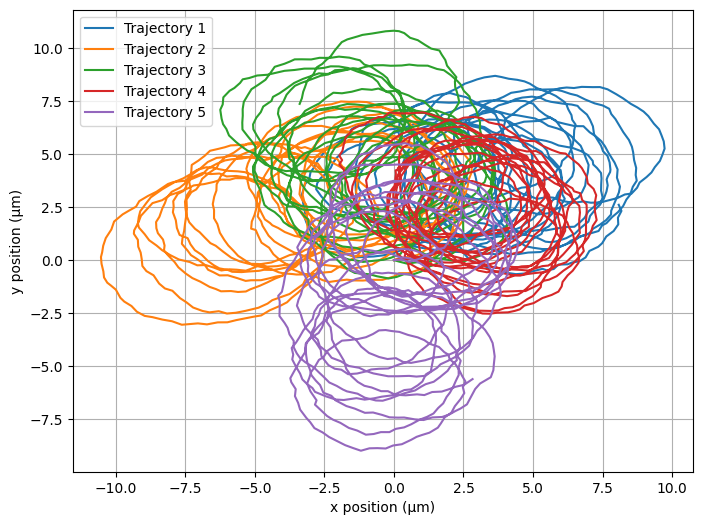

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Dt = 0.2  # Our translational diffusion coefficient (µm²/s)
Dr = 0.17  # Then, the rotational diffusion coefficient (rad²/s)
v = 30  # The self-propulsion speed (µm/s)
omega = 10  # Average angular velocity (rad/s)
dt = 0.01  # Time step (s)
T = 10  # Total simulation time (s)
n_steps = int(T / dt)  # Number of steps
n_trajectories = 5  # Number of trajectories

# We create a time array
t = np.linspace(0, T, n_steps)

# We initialize arrays for trajectories
x = np.zeros((n_trajectories, n_steps))
y = np.zeros((n_trajectories, n_steps))
theta = np.zeros((n_trajectories, n_steps))

for i in range(n_trajectories):
    for j in range(1, n_steps):
        # We do generate random Gaussian noise for each step
        xi_theta = np.sqrt(2 * Dr * dt) * np.random.randn()
        xi_x = np.sqrt(2 * Dt * dt) * np.random.randn()
        xi_y = np.sqrt(2 * Dt * dt) * np.random.randn()
        theta[i, j] = theta[i, j-1] + (omega * dt) + xi_theta

        # We do update x and y usin Euler's method
        x[i, j] = x[i, j-1] + (v * np.cos(theta[i, j-1]) * dt) + xi_x
        y[i, j] = y[i, j-1] + (v * np.sin(theta[i, j-1]) * dt) + xi_y

plt.figure(figsize=(8, 6))
for i in range(n_trajectories):
    plt.plot(x[i], y[i], label=f'Trajectory {i+1}')
plt.xlabel('x position (µm)')
plt.ylabel('y position (µm)')
plt.legend()
plt.grid()
plt.show()


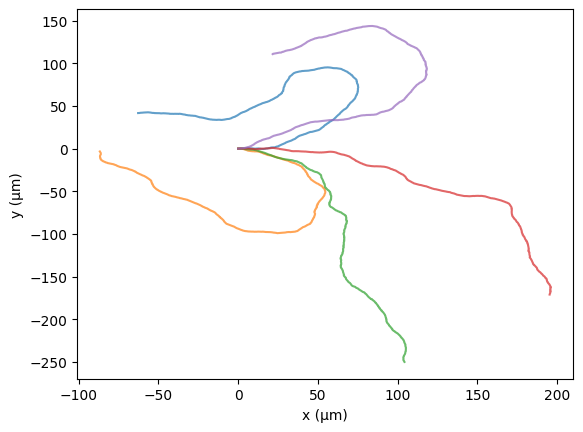

In [ ]:
steps = int(T / dt)
trajectories = 5
np.random.seed(42)
fig, ax = plt.subplots()

for _ in range(trajectories):
    theta = 0
    x = np.zeros(steps)
    y = np.zeros(steps)

    for i in range(1, steps):
        Z_theta = np.random.randn()
        theta += omega * dt + np.sqrt(2 * Dr * dt) * Z_theta
        Z_x = np.random.randn()
        Z_y = np.random.randn()
        x[i] = x[i-1] + v * np.cos(theta) * dt + np.sqrt(2 * Dt * dt) * Z_x
        y[i] = y[i-1] + v * np.sin(theta) * dt + np.sqrt(2 * Dt * dt) * Z_y

    ax.plot(x, y, alpha=0.7)

ax.set_xlabel('x (µm)')
ax.set_ylabel('y (µm)')
plt.show()

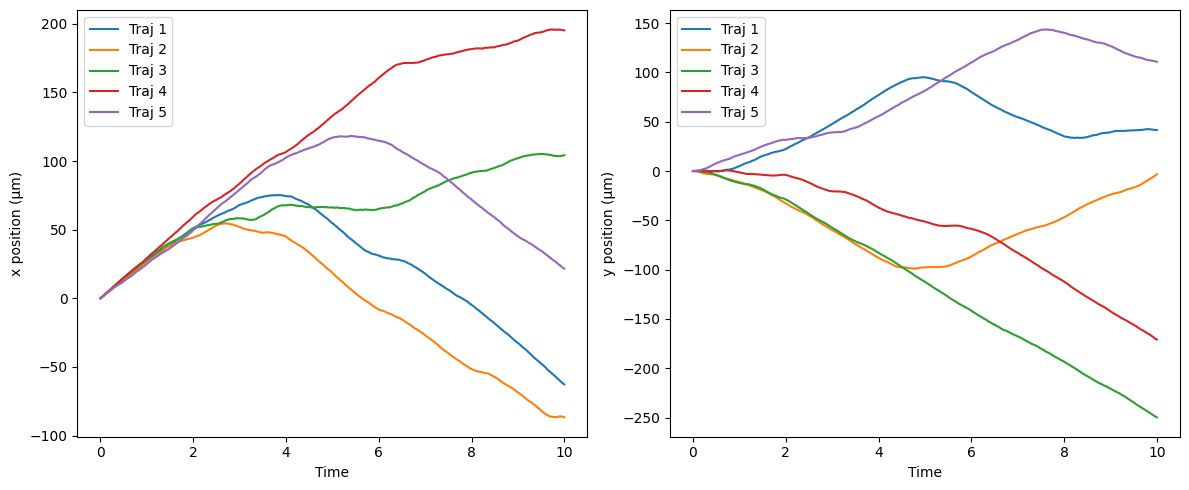

In [ ]:
np.random.seed(42)
t = np.linspace(0, T, steps)
x_all = np.zeros((trajectories, steps))
y_all = np.zeros((trajectories, steps))

for j in range(trajectories):
    theta = 0
    x = np.zeros(steps)
    y = np.zeros(steps)

    for i in range(1, steps):
        Z_theta = np.random.randn()
        theta += omega * dt + np.sqrt(2 * Dr * dt) * Z_theta

        # Update x and y
        Z_x = np.random.randn()
        Z_y = np.random.randn()
        x[i] = x[i-1] + v * np.cos(theta) * dt + np.sqrt(2 * Dt * dt) * Z_x
        y[i] = y[i-1] + v * np.sin(theta) * dt + np.sqrt(2 * Dt * dt) * Z_y

    x_all[j] = x
    y_all[j] = y

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
for j in range(trajectories):
    ax1.plot(t, x_all[j], label=f'Traj {j+1}')
ax1.set_xlabel('Time')
ax1.set_ylabel('x position (µm)')
ax1.legend()


for j in range(trajectories):
    ax2.plot(t, y_all[j], label=f'Traj {j+1}')
ax2.set_xlabel('Time')
ax2.set_ylabel('y position (µm)')
ax2.legend()

plt.tight_layout()
plt.show()


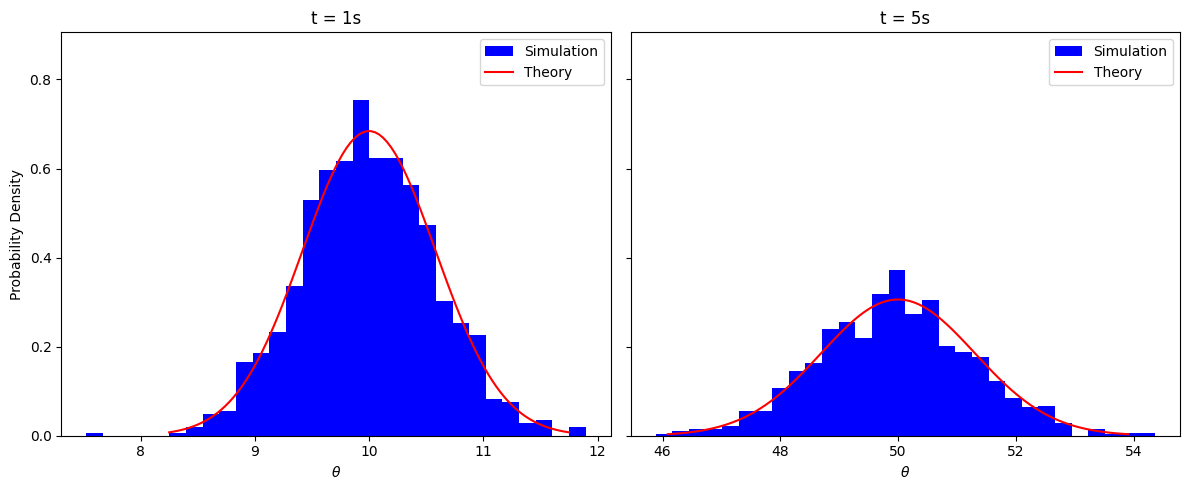

In [ ]:
# Simulate theta at t=1s and t=5s
theta_t1 = np.zeros(n_samples)
theta_t5 = np.zeros(n_samples)
steps_t1 = int(t1 / dt)
steps_t5 = int(t5 / dt)

for i in range(n_samples):
    theta = 0
    for step in range(steps_t5):
        theta += omega * dt + np.sqrt(2 * Dr * dt) * np.random.randn()
        if step == steps_t1 - 1:
            theta_t1[i] = theta
    theta_t5[i] = theta

# common y-axis limits
y_max = 1.2 * max(
    max(np.histogram(theta_t1, bins=30, density=True)[0]),
    max(np.histogram(theta_t5, bins=30, density=True)[0])
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
# t=1s
ax1.hist(theta_t1, bins=30, density=True, color="blue", label='Simulation')
theta_grid = np.linspace(omega*t1 - 3*np.sqrt(2*Dr*t1), omega*t1 + 3*np.sqrt(2*Dr*t1), 100)
ax1.plot(theta_grid, 1/np.sqrt(4*np.pi*Dr*t1) * np.exp(-(theta_grid - omega*t1)**2 / (4*Dr*t1)), 'r-', label='Theory')
ax1.set_title(f't = {t1}s')
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel('Probability Density')
ax1.legend()
ax1.set_ylim(0, y_max)
# t=5s
ax2.hist(theta_t5, bins=30, density=True, color="blue", label='Simulation')
theta_grid = np.linspace(omega*t5 - 3*np.sqrt(2*Dr*t5), omega*t5 + 3*np.sqrt(2*Dr*t5), 100)
ax2.plot(theta_grid, 1/np.sqrt(4*np.pi*Dr*t5) * np.exp(-(theta_grid - omega*t5)**2 / (4*Dr*t5)), 'r-', label='Theory')
ax2.set_title(f't = {t5}s')
ax2.set_xlabel(r'$\theta$')
ax2.legend()
ax2.set_ylim(0, y_max)

plt.tight_layout()
plt.show()



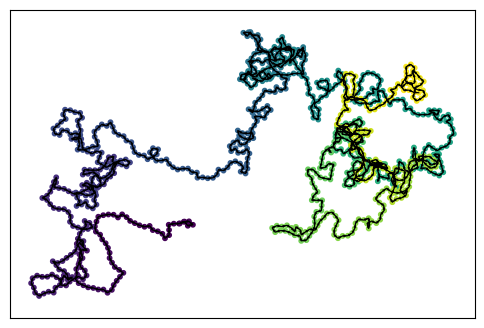

In [ ]:
def run_and_tumble_motion(steps=1000, run_length=0.05, tumble_angle_std=np.pi/4):
    x, y = [0], [0]
    theta = np.random.uniform(0, 2*np.pi)

    for _ in range(steps):
        # Running
        dx = run_length * np.cos(theta)
        dy = run_length * np.sin(theta)
        x.append(x[-1] + dx)
        y.append(y[-1] + dy)

        # Tumbling
        theta += np.random.normal(0, tumble_angle_std)

    return x, y

x, y = run_and_tumble_motion(steps=1000, run_length=10, tumble_angle_std=np.pi/3)

plt.figure(figsize=(6, 4))
plt.plot(x, y, 'k-', linewidth=0.8)
plt.scatter(x, y, c=np.arange(len(x)),  s=10)
plt.quiver(x[:-1], y[:-1], np.diff(x), np.diff(y), angles='xy', scale_units='xy', scale=1, width=0.002)
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.show()